In [42]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
from config import gkey

gmaps.configure(api_key=gkey)

In [43]:
def terrorism_frequency():
  # File to Load
    file_to_load = "Resources/globalterrorism.csv"

# Read file and store into Pandas data frame
    terror_data = pd.read_csv(file_to_load, encoding = "ISO-8859-1", low_memory=False)
    
    terror_data_groupby = terror_data.groupby(["iyear"])
    terror_data_year = terror_data_groupby.count()
    
    terror_data_year_index = terror_data_year.reset_index()
    
    terror_data_frequency_scatter_plot = plt.scatter(terror_data_year_index["iyear"], terror_data_year_index["eventid"], marker="o", s=50,
                                                facecolors="lightskyblue", edgecolors="black", linewidths=1, alpha=0.9, label="Terror Frequency") 
                        
    plt.title("Terror Frequency")
    plt.xlabel("Year")
    plt.ylabel("Number of Events")
    
    plt.savefig("TerrorFrequency.png")
    
    return(plt.show())

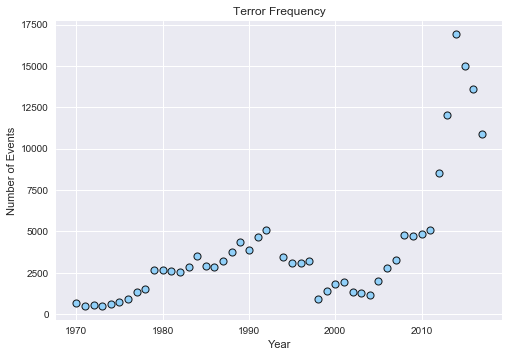

In [44]:
terrorism_frequency()

In [45]:
def terrorism_fatalities():
  # File to Load
    file_to_load = "Resources/globalterrorism.csv"

# Read file and store into Pandas data frame
    terror_data = pd.read_csv(file_to_load, encoding = "ISO-8859-1", low_memory=False)
    
    terror_data_index = terror_data.set_index(["iyear"])
    terror_data_fatalities = terror_data_index.groupby(level=0)['nkill'].sum().reset_index()
    
    terror_data_year_scatter_plot = plt.scatter(terror_data_fatalities["iyear"], terror_data_fatalities["nkill"], marker="o", s=50,
                                                facecolors="lightskyblue", edgecolors="black", linewidths=1, alpha=0.9, label="Terror Frequency") 
                        
    plt.title("Terror Fatalities")
    plt.xlabel("Year")
    plt.ylabel("Number of Fatalities")
    
    plt.savefig("TerrorFatalities.png")
    
    return(plt.show())

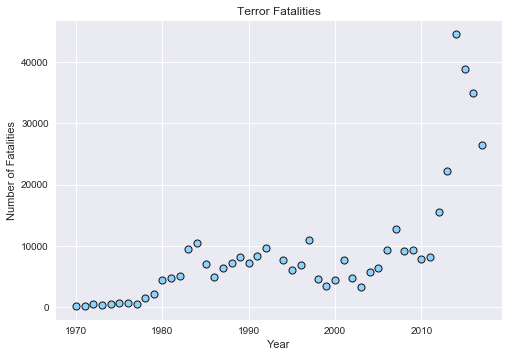

In [46]:
terrorism_fatalities()

In [34]:
def heat_map():
    
    # File to Load
    file_to_load = "Resources/globalterrorism.csv"

    # Read file and store into Pandas data frame
    terror_data = pd.read_csv(file_to_load, encoding = "ISO-8859-1", low_memory=False)
    
    terror_data_drop = terror_data.dropna(axis=0, subset=["latitude", "longitude"])
    
    # Store latitude and longitude in locations
    locations = terror_data_drop[["latitude", "longitude"]]

    # Fill NaN values and convert to float
    fatalities = terror_data_drop["nkill"]
    
    # Plot Heatmap
    fig = gmaps.figure()

    # Create heat layer
    heat_layer = gmaps.heatmap_layer(locations, weights=fatalities, 
                                     dissipating=False, max_intensity=10,
                                     point_radius=1)
    # Add layer
    fig.add_layer(heat_layer)

    # Display figure
    return(fig)

In [36]:
heat_map()

Figure(layout=FigureLayout(height='420px'))

In [21]:
def group_data():

    # File to Load
    file_to_load = "Resources/globalterrorism.csv"

    # Read file and store into Pandas data frame
    terror_data = pd.read_csv(file_to_load, encoding = "ISO-8859-1", low_memory=False)
    group = terror_data.groupby('region_txt').gname.nunique()

    return(group)

In [22]:
group_data()

region_txt
Australasia & Oceania           44
Central America & Caribbean    217
Central Asia                    50
East Asia                       82
Eastern Europe                 157
Middle East & North Africa     739
North America                  300
South America                  363
South Asia                     591
Southeast Asia                 215
Sub-Saharan Africa             492
Western Europe                 866
Name: gname, dtype: int64